<a href="https://www.kaggle.com/code/hosseintimasi/obesity-risk-xgboost-tuning?scriptVersionId=164554786" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Step 1 | Importing Libraries

In [1]:
# Import libraries and loading packages

import numpy as np # linear algebra
# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, make_scorer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier



# Step 2 | Get the data and EDA process
First download and import the dataset using pandas:

In [2]:
# importing the data sets
raw_train = pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')
raw_test = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')

In [3]:
# checkin the train dataset
train = raw_train.copy()
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
# checkin the test dataset
test = raw_test.copy()
test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [5]:
# try to find out the number of missing value
missing_value = train.isna().sum()
missing_value

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [6]:
train.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [7]:
missing_value = test.isna().sum()
missing_value

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

In [8]:
# Checking for wrong data in categorical datas:
cat_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
unique = {}
for item in cat_features:
    unique[item] = train[item].unique()
unique

{'Gender': array(['Male', 'Female'], dtype=object),
 'family_history_with_overweight': array(['yes', 'no'], dtype=object),
 'FAVC': array(['yes', 'no'], dtype=object),
 'CAEC': array(['Sometimes', 'Frequently', 'no', 'Always'], dtype=object),
 'SMOKE': array(['no', 'yes'], dtype=object),
 'SCC': array(['no', 'yes'], dtype=object),
 'CALC': array(['Sometimes', 'no', 'Frequently'], dtype=object),
 'MTRANS': array(['Public_Transportation', 'Automobile', 'Walking', 'Motorbike',
        'Bike'], dtype=object)}

In [9]:
# searching for duplicated rows
train.duplicated().sum()

0

In [10]:
count_obesity_level= train['NObeyesdad'].value_counts()
count_obesity_level

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

In [11]:
# Summary statistics for categorical variables
train.describe(include='object').T

,count,unique,top,freq
Gender,20758,2,Female,10422
family_history_with_overweight,20758,2,yes,17014
FAVC,20758,2,yes,18982
CAEC,20758,4,Sometimes,17529
SMOKE,20758,2,no,20513
SCC,20758,2,no,20071
CALC,20758,3,Sometimes,15066
MTRANS,20758,5,Public_Transportation,16687
NObeyesdad,20758,7,Obesity_Type_III,4046


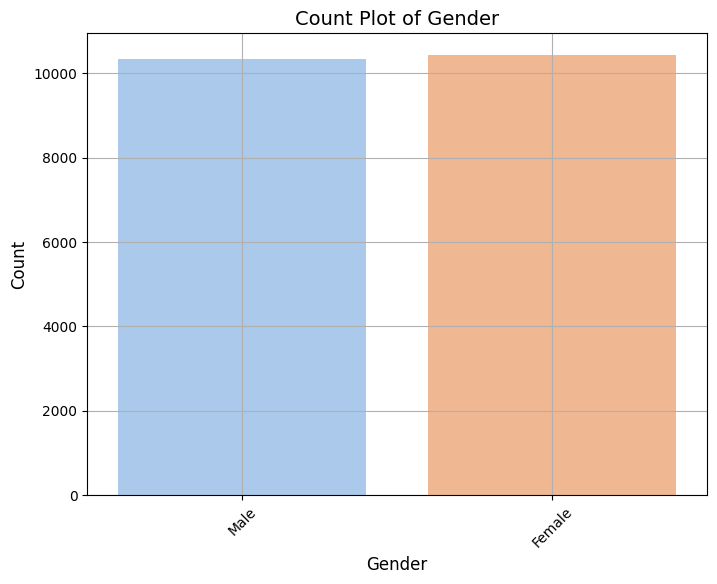

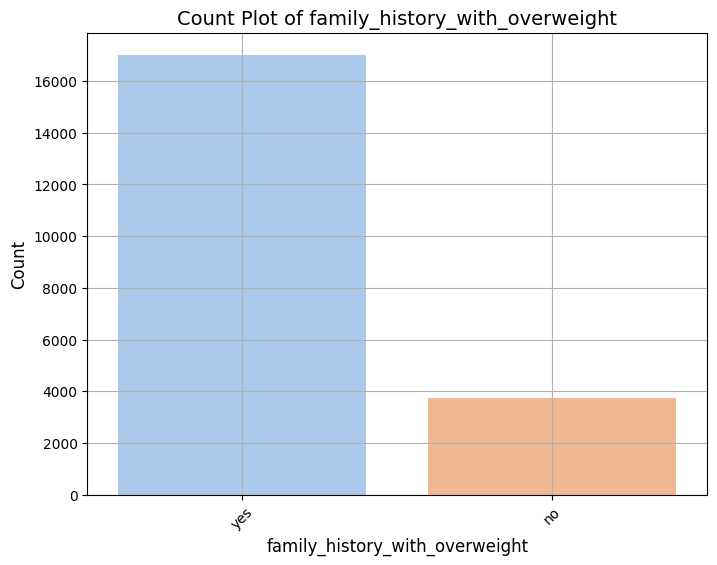

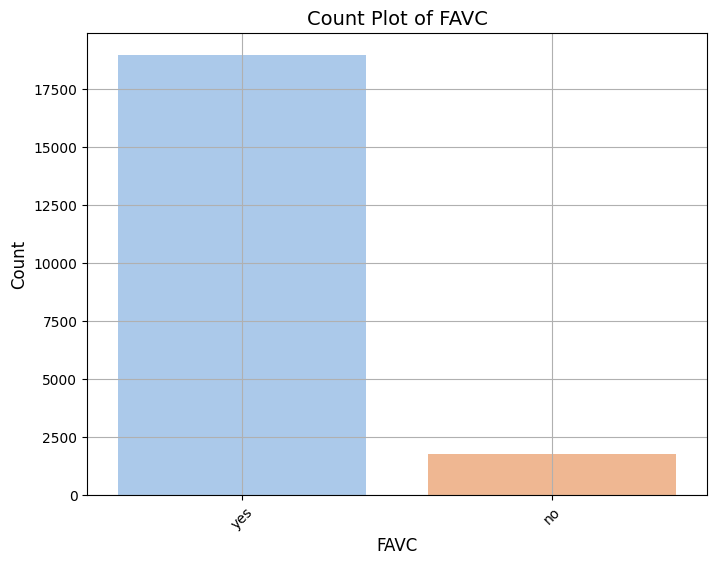

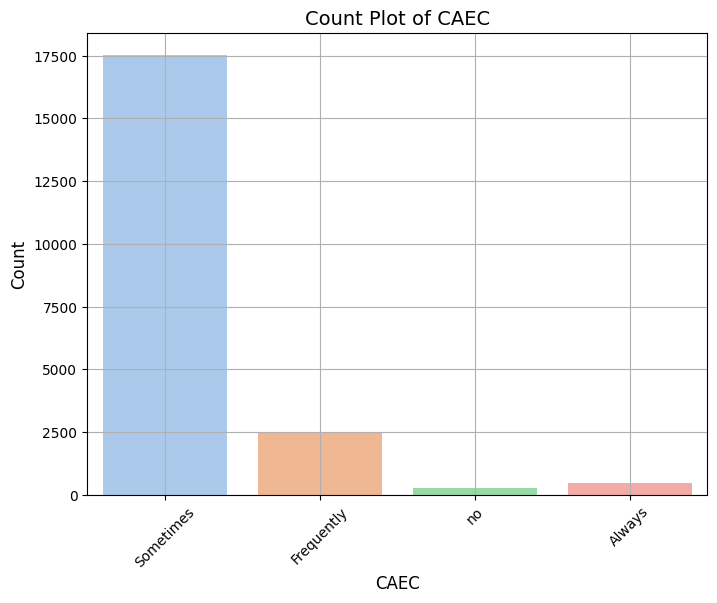

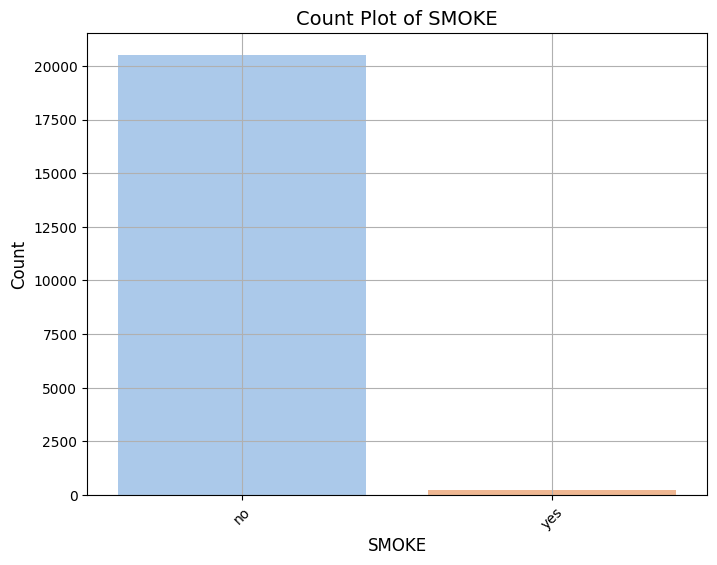

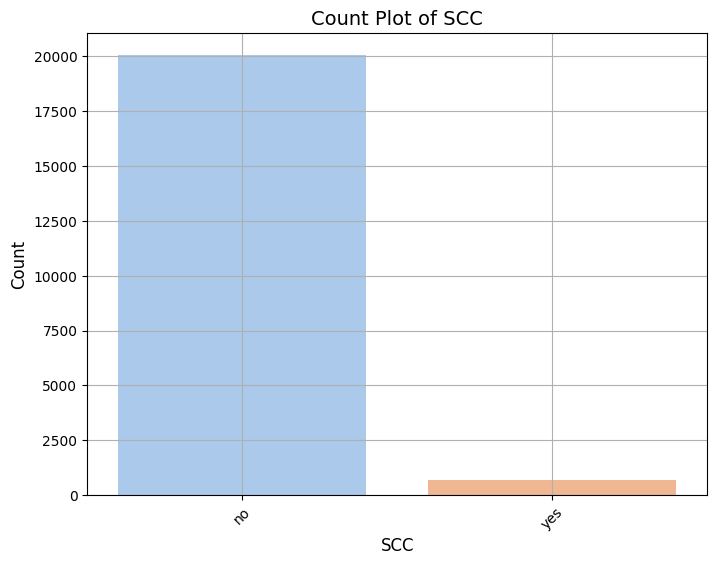

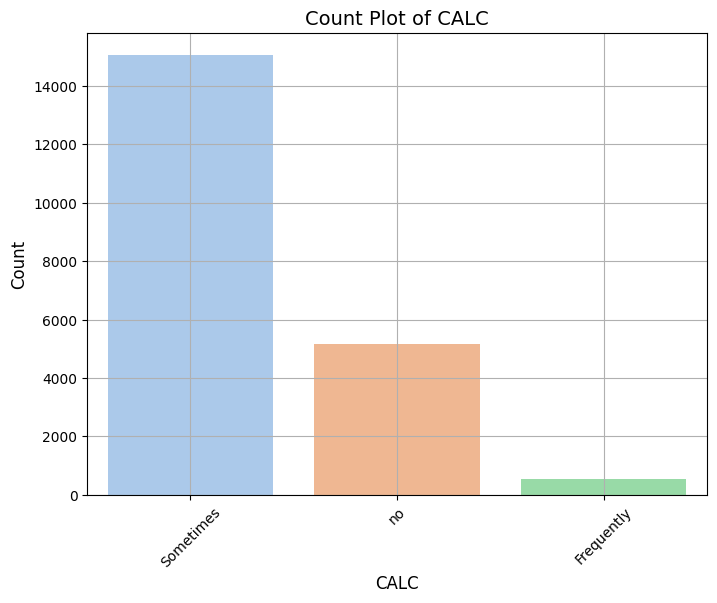

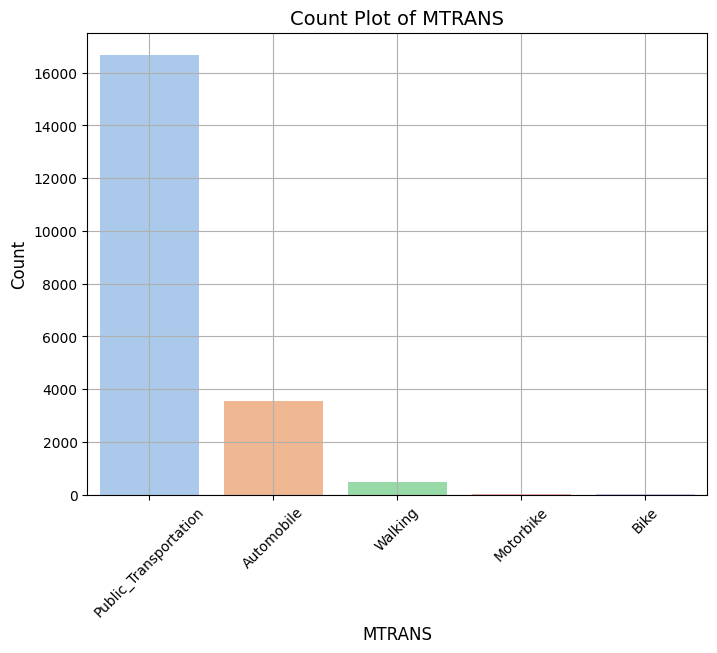

In [12]:
#plot the bar plot for all categorical columns
rotation_angle = 45
for col in cat_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=train, palette='pastel')
    plt.xticks(rotation=rotation_angle)  # Rotate x-axis labels for better readability
    plt.title(f'Count Plot of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.grid(True)
    plt.show()

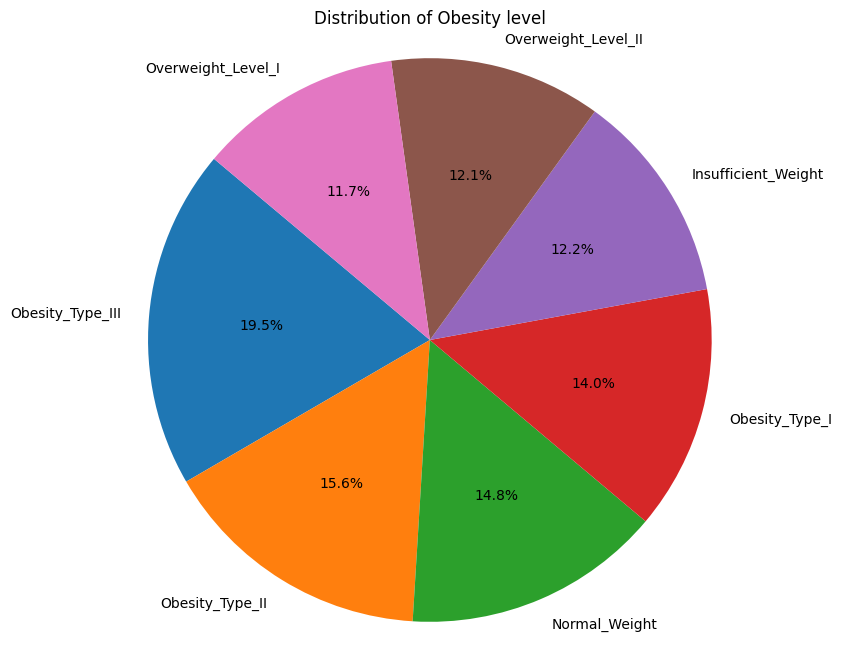

In [13]:
# we can also use a pie chart to make it easier to understand

plt.figure(figsize=(8, 8))
plt.pie(count_obesity_level, labels=count_obesity_level.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Obesity level')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'FCVC'}>,
        <Axes: title={'center': 'NCP'}>],
       [<Axes: title={'center': 'CH2O'}>,
        <Axes: title={'center': 'FAF'}>, <Axes: title={'center': 'TUE'}>]],
      dtype=object)

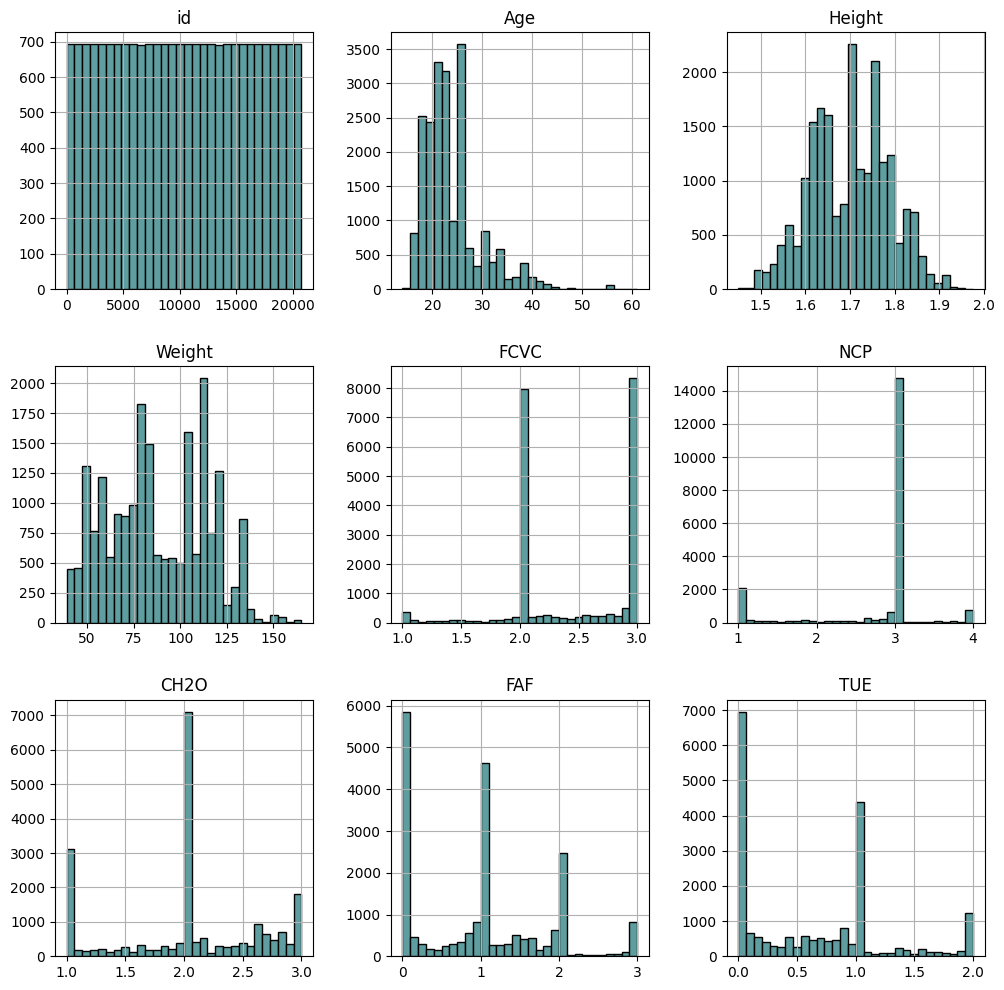

In [14]:
#plot the numericals as Histogram 
train.hist(figsize=(12, 12), bins=30, edgecolor="black", linewidth=1.0, color="cadetblue")

# Step 3 | Prepare the data set
in this step I will prepare the data in order to be able to use in prediction process

In [15]:
train_id = train.pop('id')
test_id = test.pop('id') 

### we should encode the categorical datas into numerical datas in order to use in prediction method

In [16]:
# Encode categorical columns using LabelEncoder
from sklearn.preprocessing import LabelEncoder , StandardScaler, OneHotEncoder
label_enc = LabelEncoder()

for col in cat_features:
    train[col] = label_enc.fit_transform(train[col])
    test[col] = label_enc.fit_transform(test[col])

    
# Identify numerical columns as those not found in categorical columns
num_cols = [col for col in test.columns if col not in cat_features]
# Scale numerical columns using StandardScaler
for num in num_cols:
    train[num] = StandardScaler().fit_transform(train[[num]])
    test[num] = StandardScaler().fit_transform(test[[num]])
    
    
train['NObeyesdad'] = label_enc.fit_transform(train['NObeyesdad'])

In [17]:
train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,0.105699,-0.002828,-0.235713,1,1,-0.836279,0.314684,2,0,1.206594,0,-1.171141,0.597438,1,3,6
1,0,-1.027052,-1.606291,-1.170931,1,1,-0.836279,0.338364,1,0,-0.048349,0,0.021775,0.636513,2,0,1
2,0,-1.027052,0.128451,-1.430012,1,1,-1.060332,-1.913423,2,0,-0.195644,0,-0.138022,1.755239,2,3,0
3,0,-0.507929,0.120090,1.644770,1,1,1.039171,0.338364,2,0,-0.584035,0,0.579896,0.271455,1,3,4
4,1,1.371197,2.450367,0.224054,1,1,0.438397,-1.119801,2,0,-0.081469,0,1.176486,0.523111,1,3,6


In [18]:
test.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1,0.508163,1.682789,1.273786,1,1,0.932524,0.350808,2,0,1.298389,0,-0.141769,-1.005016,2,3
1,0,-0.509128,-1.114658,-0.818988,1,1,-0.833161,-2.462523,2,0,1.583678,0,0.030307,-1.005016,2,3
2,0,0.353000,-0.626191,0.927432,1,1,1.047997,0.350808,2,0,0.965029,0,-1.159701,-0.592995,2,3
3,1,-0.512705,-1.642760,0.623672,1,1,-0.833161,0.319733,2,0,1.234234,0,-1.046828,-1.005016,2,3
4,0,0.353000,-0.805996,0.668336,1,1,1.047997,0.350808,2,0,1.016818,0,-1.159701,0.213881,2,3


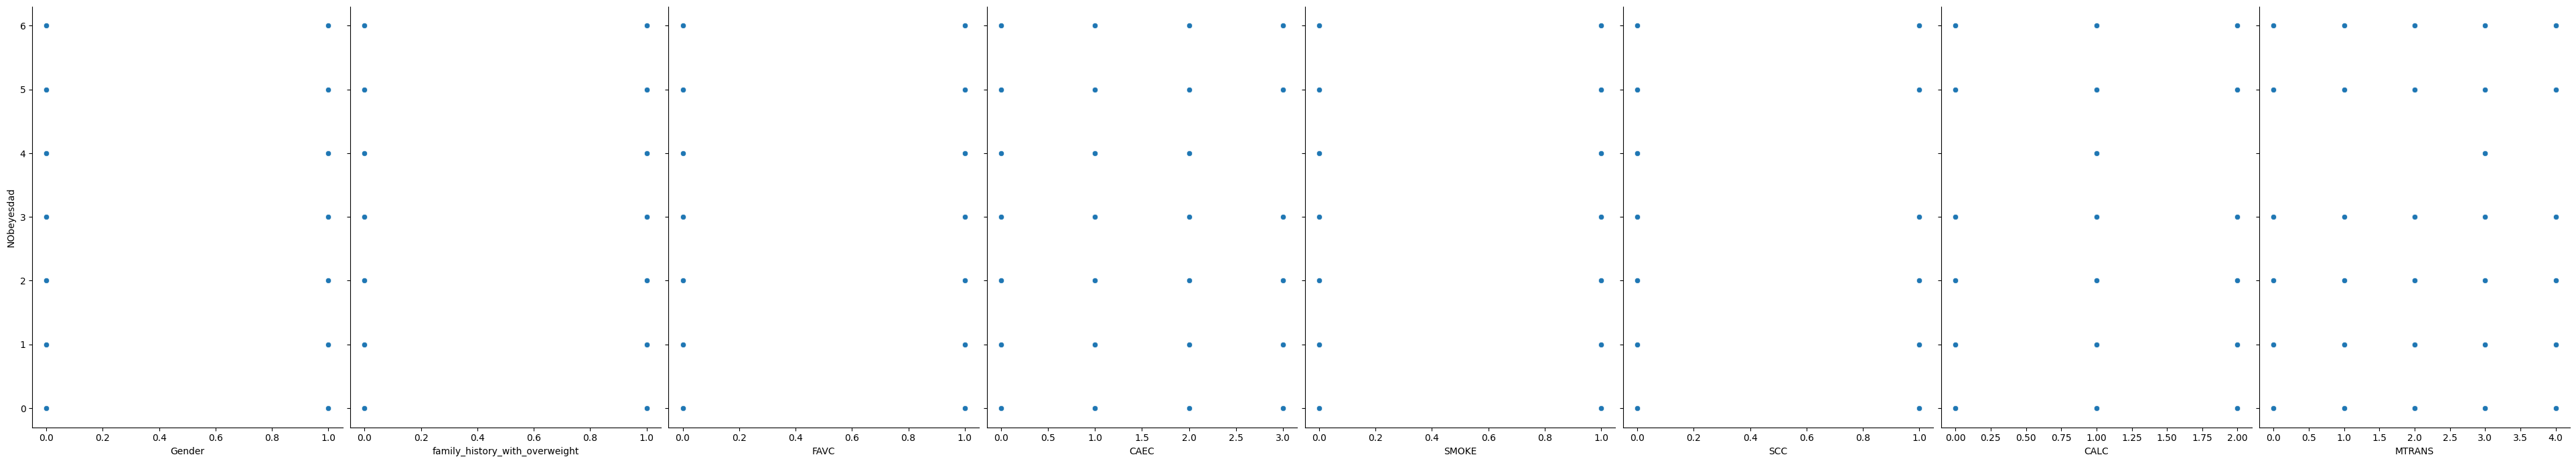

In [19]:
# visualize the relationship between the features and the response using scatter plots
sns.pairplot(train, x_vars=['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS'],
             y_vars='NObeyesdad', height=7, aspect=0.7)

# Step 4 | Splitting The Data

In [20]:
from sklearn.model_selection import train_test_split

# I am going to delet the id column from X features because I dont want to use it
X = train.iloc[:, :-1]
y = train.NObeyesdad

X_test = test.copy()

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5 | Selecting best model

In [21]:
# creating the fit and predict function
def modelfit(alg, X_train, y_train):
    alg.fit(X_train, y_train)
    val_predictions = alg.predict(X_val)
    mae = mean_absolute_error(y_val, val_predictions)
    print("MAE:", mae)

    accuracy = accuracy_score(y_val, val_predictions)
    print("Accuracy:", accuracy)

    cvs = cross_val_score(alg, X, y, cv=10, scoring='accuracy').mean()
    print("CVscore:", cvs)

## 1- KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier()

Text(0, 0.5, 'Cross-validated  Accuracy')

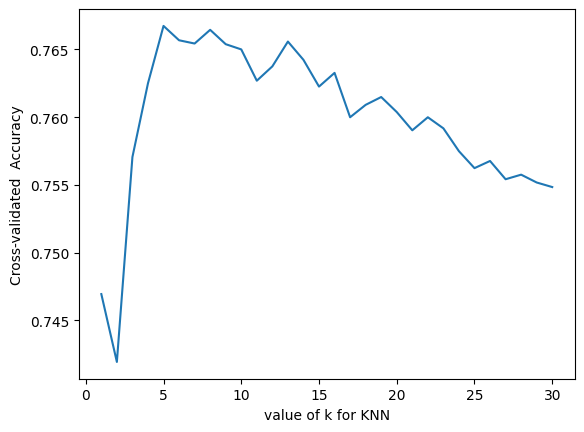

In [23]:
# Search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
# plot the value of k for KNN (x-axis) versus the cross validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('value of k for KNN')
plt.ylabel('Cross-validated  Accuracy')

### KNN (n=5)

In [24]:
knn = KNeighborsClassifier(n_neighbors=5)
modelfit(knn, X_train, y_train)

MAE: 0.6483622350674374
Accuracy: 0.7584296724470135
CVscore: 0.766740279035216


## 2- Logestic Regression

In [25]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='liblinear')
modelfit(logreg, X_train, y_train)

MAE: 0.6840077071290944
Accuracy: 0.7579479768786127
CVscore: 0.7553713582654317


## 3- Random Forest Classifier

In [26]:
rfc = RandomForestClassifier()
modelfit(rfc, X_train, y_train)

MAE: 0.2661368015414258
Accuracy: 0.8947495183044316
CVscore: 0.8990269285233419


## 4- XGBoost

In [27]:
xgbc = xgb.XGBClassifier()
modelfit(xgbc, X_train, y_train)

MAE: 0.24807321772639693
Accuracy: 0.9002890173410405
CVscore: 0.9058679341644034


## 5- Gaussian Naive Bayes Classifier

In [28]:
gnb = GaussianNB()
modelfit(gnb, X_train, y_train)

MAE: 0.8728323699421965
Accuracy: 0.6630539499036608
CVscore: 0.6622512013371404


# 6- Gradient Boost Classifier

In [29]:
gbc = GradientBoostingClassifier(random_state=42)
modelfit(gbc, X_train, y_train)

MAE: 0.24446050096339114
Accuracy: 0.9026974951830443
CVscore: 0.903892518049075


# Step 6 | Hyper Parameters Tuning


In [30]:
# Define the parameter grid for XGBoost
param_grid_xgb = {
    'learning_rate': [0.5, 0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7,11, None],
    'subsample': [0.6, 0.8, 1.0],
}

# Define scorer
scorer = make_scorer(accuracy_score)

# GridSearch for XGBoost
grid_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, scoring=scorer)
grid_xgb.fit(X_train, y_train)

# Get best parameters and best scores
print("Best parameters for XGBoost:", grid_xgb.best_params_)
print("Best score for XGBoost:", grid_xgb.best_score_)

# Evaluate on test set
y_pred_xgb = grid_xgb.predict(X_val)
accuracy_xgb = accuracy_score(y_val, y_pred_xgb)
print("Accuracy on test set for XGBoost:", accuracy_xgb)

Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': None, 'subsample': 0.6}
Best score for XGBoost: 0.9082263616803001
Accuracy on test set for XGBoost: 0.9079961464354528


## 6.1. GridSearchCV

In [31]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd



# Define the parameter grid for XGBoost
param_grid_xgb = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 3, 5]
}

# Define scorer
scorer = make_scorer(accuracy_score)

# Initialize StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# GridSearch for XGBoost
grid_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, scoring=scorer, cv=cv, n_jobs=-1)
grid_xgb.fit(X_train, y_train)

# Get best parameters and best scores
print("Best parameters for XGBoost:", grid_xgb.best_params_)
print("Best score for XGBoost:", grid_xgb.best_score_)

# Evaluate on test set
y_pred_xgb = grid_xgb.predict(X_val)
accuracy_xgb = accuracy_score(y_val, y_pred_xgb)
print("Accuracy on test set for XGBoost:", accuracy_xgb)


Best parameters for XGBoost: {'colsample_bytree': 0.6, 'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'subsample': 0.6}
Best score for XGBoost: 0.909731798959837
Accuracy on test set for XGBoost: 0.9108863198458574


## 6.2. RandomizedSearchCV

I expanded the ranges of some hyperparameters in the parameter grid to cover a broader range of values.
I switched from GridSearchCV to RandomizedSearchCV, which can be more efficient for exploring a large hyperparameter space.
I increased the number of iterations (n_iter) in RandomizedSearchCV to 100 to allow for a more thorough search of the hyperparameter space.

In [32]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd


# Define the parameter grid for XGBoost
param_grid_xgb = {
    'learning_rate': [0.01, 0.001, 0.0001],
    'max_depth': [3, 5, 7, 9, 11],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 3, 5],
    'reg_alpha': [0, 0.001, 0.01, 0.1, 1, 10],
    'reg_lambda': [0, 0.001, 0.01, 0.1, 1, 10]
}

# Define scorer
scorer = make_scorer(accuracy_score)

# Initialize StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# RandomizedSearch for XGBoost with more iterations
random_search_xgb = RandomizedSearchCV(XGBClassifier(), param_distributions=param_grid_xgb, 
                                      n_iter=100, scoring=scorer, cv=cv, 
                                      random_state=42, n_jobs=-1)
random_search_xgb.fit(X_train, y_train)

# Get best parameters and best scores
print("Best parameters for XGBoost:", random_search_xgb.best_params_)
print("Best score for XGBoost:", random_search_xgb.best_score_)

# Evaluate on test set
y_pred_xgb = random_search_xgb.best_estimator_.predict(X_val)
accuracy_xgb = accuracy_score(y_val, y_pred_xgb)
print("Accuracy on test set for XGBoost:", accuracy_xgb)


Best parameters for XGBoost: {'subsample': 0.6, 'reg_lambda': 0, 'reg_alpha': 0, 'min_child_weight': 1, 'max_depth': 11, 'learning_rate': 0.01, 'gamma': 0.2, 'colsample_bytree': 0.6}
Best score for XGBoost: 0.9048539854783371
Accuracy on test set for XGBoost: 0.9051059730250481


In [33]:
xgbc = xgb.XGBClassifier(
                            learning_rate=0.1,
                            max_depth=7,
                            gamma=0.3,
                            colsample_bytree=0.6,
                            subsample=0.6,
                            min_child_weight=1,
                            )
modelfit(xgbc, X_train, y_train)

MAE: 0.2271194605009634
Accuracy: 0.9108863198458574
CVscore: 0.9087584093599833


In [34]:
xgbc = xgb.XGBClassifier(
                            learning_rate=0.1,
                            #n_estimators=2000,
                            #early_stopping_rounds=50,
                            max_depth=7,
                            min_child_weight=1,
                            gamma=0.1,
                            colsample_bytree=0.6,
                            subsample=0.6,
                            #reg_alpha=1,
                            #objective='multi:softprob',
                            #nthread=-1,
                            #random_state=42
                            )
modelfit(xgbc, X_train, y_train)

MAE: 0.22832369942196531
Accuracy: 0.910645472061657
CVscore: 0.909095619472108


# Step 7 | Creat the submission csv

In [35]:
model = xgb.XGBClassifier(
                            learning_rate=0.1,
                            max_depth=7,
                            gamma=0.3,
                            colsample_bytree=0.6,
                            subsample=0.6,
                            min_child_weight=1, 
                          )
model.fit(X, y)
y_pred = model.predict(X_test)

# Create a DataFrame with the test predictions
result = pd.DataFrame({'NObeyesdad': y_pred})

# Concatenate the predictions with the test data
result_df = pd.concat([raw_test['id'], result], axis=1)

In [36]:
result_df.head()

,id,NObeyesdad
0,20758,3
1,20759,5
2,20760,4
3,20761,2
4,20762,4


In [37]:
result_df['NObeyesdad']=label_enc.inverse_transform(result_df['NObeyesdad'])
result_df.head()

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III


In [38]:
result_df.to_csv('submission.csv', index=False)
print("Finish")

Finish
